# Inspecting the arrangement of neurons in xy

The time-series data is extracted for neurons, where the centre of each 'blob' identified as a neuron is recorded as pixel coordinates in x and y. The pixel size is 0.295 microns, and each z plane represents 4 microns.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = np.load('/Users/Megan/data_analysis/Aug02_2018_B3/B3_TS/Extracted/rg_B3_TS_ZP_1.npz')

In [3]:
coords = data['xy']

Text(0,0.5,'y pixel')

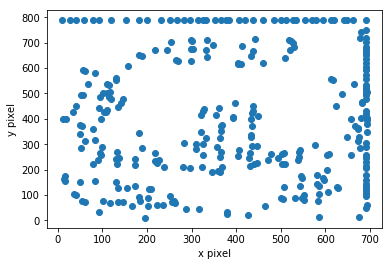

In [7]:
plt.scatter(coords[:,0], coords[:,1])
plt.xlabel('x pixel')
plt.ylabel('y pixel')

Aha! We know from the images that some of these data points are 'real' in that it seems like they could be neurons. However, many of those crowded around the edge of the image are artifacts. It would be good to clean up the data by first removing any points from a small range at the edges of the image. 

In [10]:
max_x = max(coords[:,0])
max_x

788.0

In [14]:
max_y = max(coords[:,1])
max_y

788.0

Before we go further: each cell is represented in multiple z stacks. We need a function to preprocess all of the data and in effect 'join together' all of the different z stacks, so that we have a full volume of cells represented. If we do not do this, we will only be finding correlations between cells in a plane.